In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import accuracy_score

In [3]:
X,y = load_iris(return_X_y=True, as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2130)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120 entries, 82 to 110
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  120 non-null    float64
 1   sepal width (cm)   120 non-null    float64
 2   petal length (cm)  120 non-null    float64
 3   petal width (cm)   120 non-null    float64
dtypes: float64(4)
memory usage: 4.7 KB


In [4]:
X_train.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
123,6.3,2.7,4.9,1.8
71,6.1,2.8,4.0,1.3
111,6.4,2.7,5.3,1.9
96,5.7,2.9,4.2,1.3
124,6.7,3.3,5.7,2.1
100,6.3,3.3,6.0,2.5
3,4.6,3.1,1.5,0.2
105,7.6,3.0,6.6,2.1
13,4.3,3.0,1.1,0.1
146,6.3,2.5,5.0,1.9


In [5]:
X_train.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,120.000000,120.000000,120.000000,120.000000
mean,5.848333,3.020833,3.776667,1.199167
std,0.827975,0.456493,1.734898,0.740939
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.700000,1.600000,0.300000
50%,5.800000,3.000000,4.250000,1.300000
75%,6.400000,3.225000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


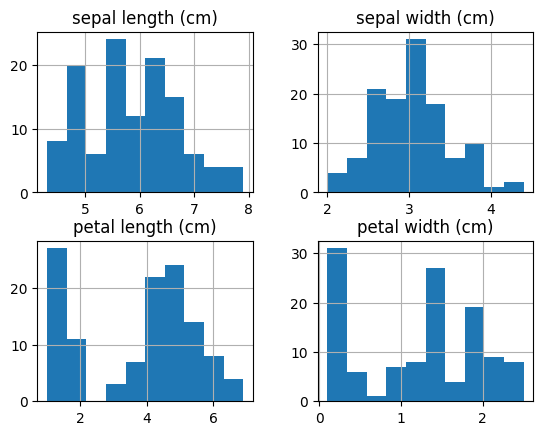

In [6]:
X_train.hist()
plt.show()

In [7]:
y_train.sample(10)

123    2
29     0
100    2
1      0
132    2
134    2
31     0
7      0
60     1
101    2
Name: target, dtype: int64

In [9]:
df_train = X
df_train['Specie'] = y
df_train.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Specie
139,6.9,3.1,5.4,2.1,2
50,7.0,3.2,4.7,1.4,1
128,6.4,2.8,5.6,2.1,2
19,5.1,3.8,1.5,0.3,0
85,6.0,3.4,4.5,1.6,1
94,5.6,2.7,4.2,1.3,1
13,4.3,3.0,1.1,0.1,0
29,4.7,3.2,1.6,0.2,0
8,4.4,2.9,1.4,0.2,0
0,5.1,3.5,1.4,0.2,0


/workspaces/decision_tree/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


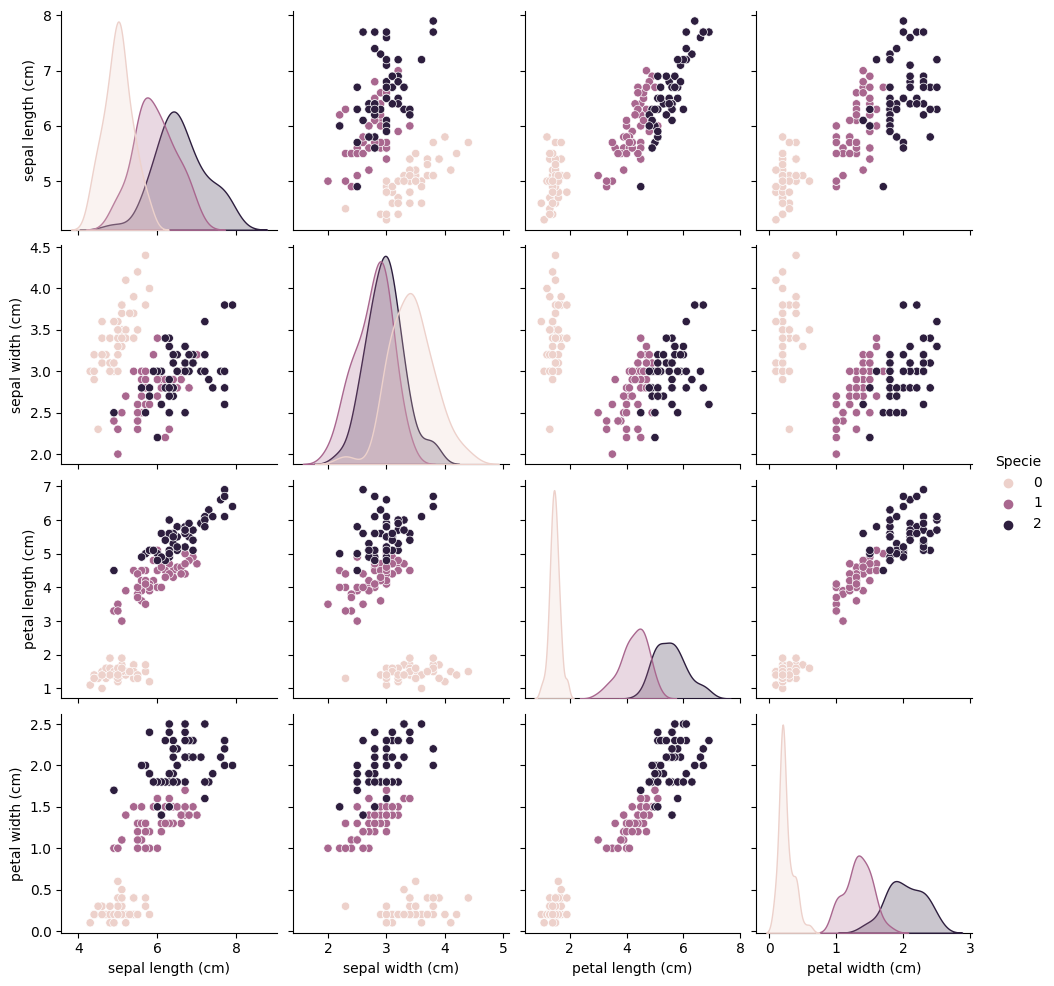

In [11]:
sns.pairplot(data=df_train,hue='Specie')
plt.show()

In [12]:
X_train.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.061827,0.862976,0.812761
sepal width (cm),-0.061827,1.000000,-0.402907,-0.339329
petal length (cm),0.862976,-0.402907,1.000000,0.963775
petal width (cm),0.812761,-0.339329,0.963775,1.000000


In [13]:
model = DecisionTreeClassifier(random_state=2150)
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=2150)

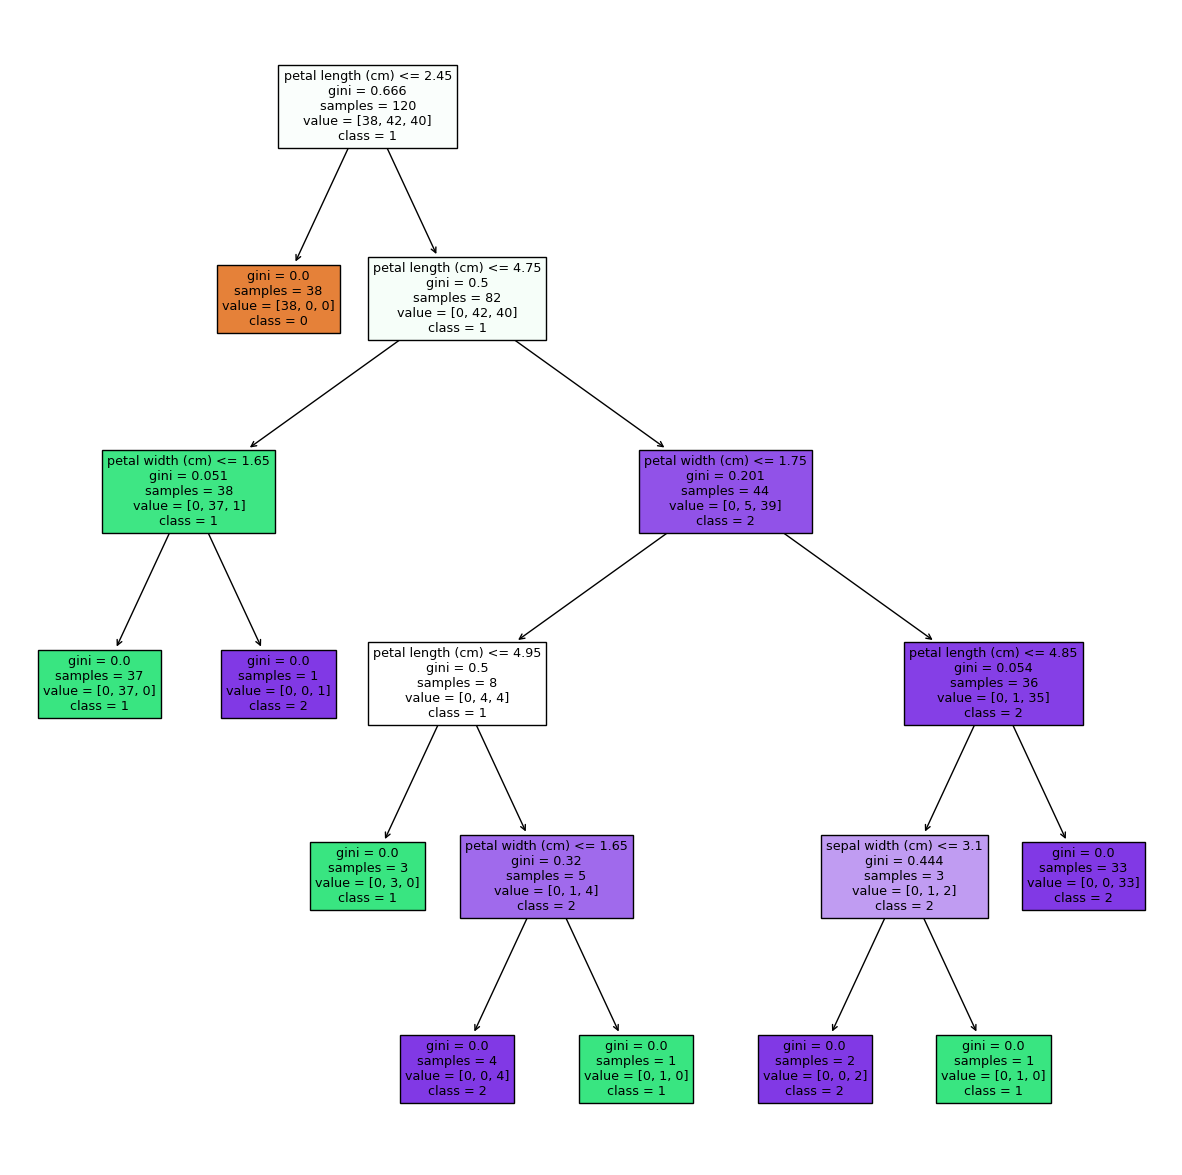

In [16]:
fig = plt.figure(figsize=(15,15))
tree.plot_tree(model, feature_names=list(X_train.columns),class_names=['0','1','2'],filled=True)
plt.show()

In [18]:
y_hat = model.predict(X_test)
print(f'accuracy: {accuracy_score(y_test,y_hat)}')

accuracy: 0.9666666666666667
